In [439]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [440]:
# num refers to the recored number of VISSIM runs.
num = 289
delay_file_newname = 'simple_intersection_{}_delay.csv'.format(num)
lc_file_newname = 'simple_intersection_{}_lc.csv'.format(num)

In [441]:
# change the format of file to be .csv
for filename in os.listdir('.'):
    if filename == 'simple_intersection_{}.rsr'.format(num):
        os.rename(filename,delay_file_newname)
    if filename == 'simple_intersection_{}.spw'.format(num):
        os.rename(filename,lc_file_newname)
        

In [442]:
delay_df = pd.read_csv(delay_file_newname,sep=';',index_col=False,skiprows=range(8))
lc_df = pd.read_csv(lc_file_newname,sep=';',index_col=False,skiprows=range(8))

delay_df,  
**rename**:  
'Veh'-->'VehNo'  
'Time'-->'SimTimeAtEnd'  
**Columns to keep**:  
['SimTime','VehNo','Delay']


lc_df,  
**rename**:  
't'-->'LcTime'  
'v'-->'LcSpeed'  
'Lane'-->'OriginalLane'  
'New Lane'-->'TargetLane'    
**Columns to keep**： ['LcTime','LcSpeed','OriginalLane','TargetLane']
    


In [443]:
# rename the columns and only keep a subset of columns
delay_df = delay_df.rename(columns={'   Veh': 'VehNo', '  Time': 'SimTimeAtEnd', "Delay.": "Delay"})
delay_df = delay_df[['VehNo','SimTimeAtEnd','Delay']]
lc_df = lc_df.rename(columns={' VehNo': 'VehNo', ' v [m/s]': 'LcSpeed', 't': 'LcTime', ' Lane': 'OriginalLane', ' New Lane':'TargetLane'})
lc_df = lc_df[['VehNo','LcTime','LcSpeed','OriginalLane','TargetLane']]

In [444]:
# set VehNo as index to concatenate on
lc_df = lc_df.drop_duplicates('VehNo')
delay_df = delay_df.set_index('VehNo')
lc_df = lc_df.set_index('VehNo')
delay_df = delay_df.sort_index()
lc_df = lc_df.sort_index()

In [445]:
# concatenate two dataframes
mega_df = pd.concat([delay_df, lc_df],axis=1,sort=False)

In [446]:
# add an is_lc column to indicate whether the vehicle has changesd lane or not
mega_df['is_lc'] = 0
index_to_change = mega_df[mega_df.index.isin(lc_df.index)].index
mega_df.loc[index_to_change,'is_lc'] = 1

mega_df = mega_df.dropna(axis=0, subset=['Delay'])

In [447]:
x_upper = 300
y_upper = 300
binsize = 20

delay mean for vehicles changed lanes:  17.011249182472195
delay std for vehicles changed lanes:  14.271690723091973


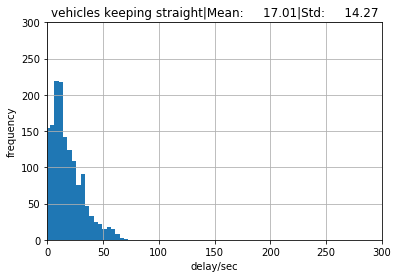

In [448]:
# delay mean and std for vehicles have not changed lanes
ulc_delay_mean = mega_df[mega_df['is_lc']==0]['Delay'].mean()
ulc_delay_std = mega_df[mega_df['is_lc']==0]['Delay'].std()
print('delay mean for vehicles changed lanes: ',ulc_delay_mean)
print('delay std for vehicles changed lanes: ',ulc_delay_std)

# plot delay distribution
mega_df[mega_df['is_lc']==0]['Delay'].hist(bins=binsize)
plt.xlabel('delay/sec')
plt.ylabel('frequency')
plt.xlim((0,x_upper))
plt.ylim((0,y_upper))
plt.title('vehicles keeping straight|Mean:{:10.2f}|Std:{:10.2f}'.format(ulc_delay_mean,ulc_delay_std))
plt.savefig('delay distribution images/{}_ulc.png'.format(num))

delay mean for vehicles changed lanes:  19.085265104808865
delay std for vehicles changed lanes:  15.612459983822404


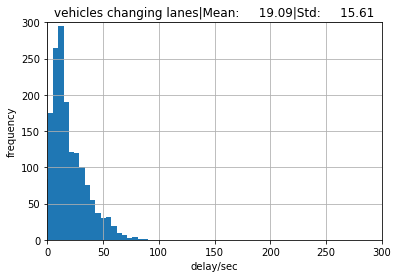

In [449]:
# delay mean and std for vehicles have changed lanes
lc_delay_mean = mega_df[mega_df['is_lc']==1]['Delay'].mean()
lc_delay_std = mega_df[mega_df['is_lc']==1]['Delay'].std()
print('delay mean for vehicles changed lanes: ',lc_delay_mean)
print('delay std for vehicles changed lanes: ',lc_delay_std)

# plot delay distribution
mega_df[mega_df['is_lc']==1]['Delay'].hist(bins=binsize)
plt.xlabel('delay/sec')
plt.ylabel('frequency')
plt.xlim((0,x_upper))
plt.ylim((0,y_upper))
plt.title('vehicles changing lanes|Mean:{:10.2f}|Std:{:10.2f}'.format(lc_delay_mean,lc_delay_std))
plt.savefig('delay distribution images/{}_lc.png'.format(num))